## Task 1:

### Download the data (sonar.all-data) from the Sonar, Mines vs. Rocks Data Set: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

In [2]:
import plotly as ply
import pandas as pd
import numpy as np
import math 
import sklearn.preprocessing as MinMaxscaler
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path

import sklearn
from sklearn.datasets import load_linnerud


!pip install mglearn

from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 5.0
plt.rcParams['lines.markersize'] = 15.0

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

In [3]:
## Load data

df = pd.read_csv('sonar.all-data', header =None,  prefix='X')
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


### Substitute the categories M and R of the last column for integers

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# df_encoded = pd.DataFrame()
le.fit(df.X60)

LabelEncoder()

In [5]:
df["X60"] = le.fit_transform(df["X60"])
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


### Find the best parameters on the validation set using gridsearch (min. 2 parameters) for one model.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC

X = np.array(df.iloc[:,:60])
y = df.iloc[:,-1:].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)

0.8269230769230769

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(solver='liblinear', C=0.1)

scores = cross_val_score(logreg, X, y)
print("Cross-validation scores: {}".format(scores))


Cross-validation scores: [0.54761905 0.66666667 0.61904762 0.70731707 0.41463415]


In [8]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.59


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y)
cross_val_scores = []

neighbors = np.arange(1,61)
# list(range(1, 61))
# np.arange(1,61)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    cross_val_scores.append(np.mean(scores))
    
print("best cross-validation score: {:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print("best n_neighbors:", best_n_neighbors)

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))


best cross-validation score: 0.859
best n_neighbors: 1
test-set score: 0.692


In [10]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
cross_val_score(clf, X, y)

array([0.54761905, 0.78571429, 0.61904762, 0.70731707, 0.53658537])

In [11]:
print("Size of training set: {}, size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

Size of training set: 156, size of test set: 52


In [12]:
from sklearn.svm import SVC

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}\n size of validation set: {}\n size of test set:" 
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 117
 size of validation set: 39
 size of test set: 52



In [13]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

In [14]:
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.87
Best parameters:  {'C': 10, 'gamma': 1}
Test set score with best parameters: 0.85


In [15]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,100],#,1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.94
Best parameters: {'C': 10, 'gamma': 1}
Best cross-validation score: 0.87

Best estimator:
SVC(C=10, gamma=1)


### Plot a heatmap of the parameters

In [16]:
import mglearn

# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001996,0.000085,0.000842,0.000097,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.53125,0.516129,0.516129,0.516129,0.516129,0.519153,0.006048,13
1,0.002431,0.000623,0.001046,0.000440,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.53125,0.516129,0.516129,0.516129,0.516129,0.519153,0.006048,13
2,0.001714,0.000056,0.000652,0.000050,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.53125,0.516129,0.516129,0.516129,0.516129,0.519153,0.006048,13
3,0.001668,0.000025,0.000635,0.000009,0.001,1,"{'C': 0.001, 'gamma': 1}",0.53125,0.516129,0.516129,0.516129,0.516129,0.519153,0.006048,13
4,0.001684,0.000027,0.000629,0.000005,0.001,10,"{'C': 0.001, 'gamma': 10}",0.53125,0.516129,0.516129,0.516129,0.516129,0.519153,0.006048,13


In [17]:
param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma': np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma': np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma': np.logspace(-7, -2, 6)}

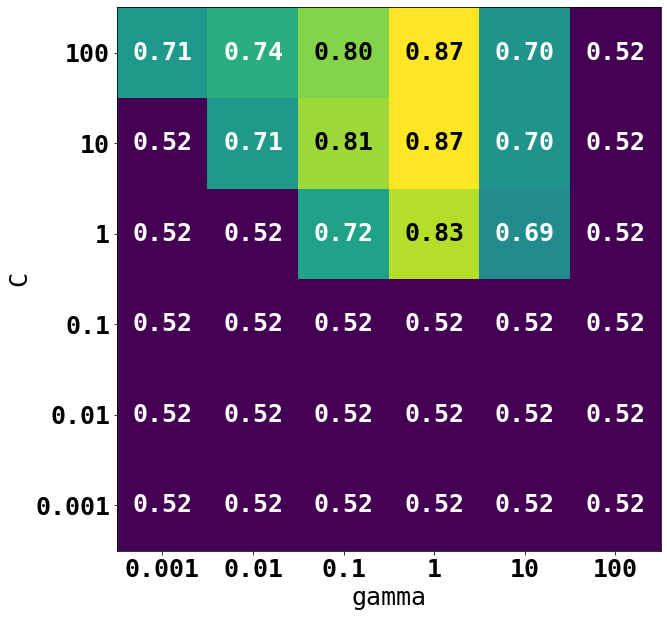

In [18]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In [19]:
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 18}
rc('font', **font) 
plt.rcParams['figure.figsize'] = [35, 10]

def plot_params():
    fig, axes = plt.subplots(1, 3)
    for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                               param_grid_range], axes):
        grid_search = GridSearchCV(SVC(), param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

        # plot the mean cross-validation scores
        scores_image = mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
                       yticklabels=param_grid['C'], cmap="viridis", ax=ax)
    plt.colorbar(scores_image, ax=axes.tolist())

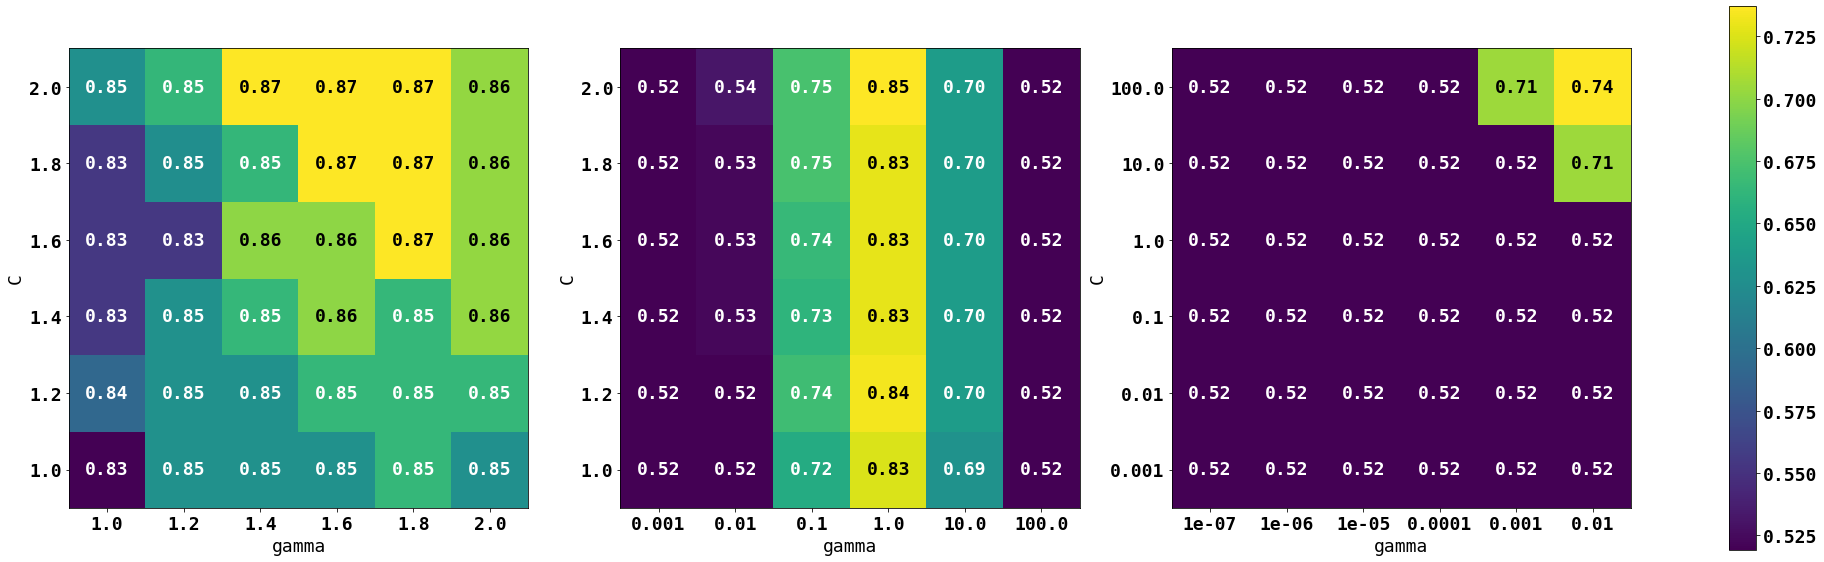

In [20]:
plot_params()

### Plot a ROC curve

In [21]:
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams['lines.markersize'] = 20

In [22]:
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from mglearn.datasets import make_blobs

X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2],random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
y_test, rf.predict_proba(X_test)[:, 1])

In [23]:
from sklearn.metrics import roc_curve

def plot_roc_curve():
    fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

    close_zero = np.argmin(np.abs(thresholds))

    plt.plot(fpr, tpr, label="ROC Curve SVC")
    plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
    plt.xlabel("FPR")
    plt.ylabel("TPR (recall)")
    plt.plot(fpr[close_zero], tpr[close_zero], 'o', 
    label="threshold zero SVC", fillstyle="none", c='k', mew=2)
    close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
    plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^',
    label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)
    plt.legend(loc=4)

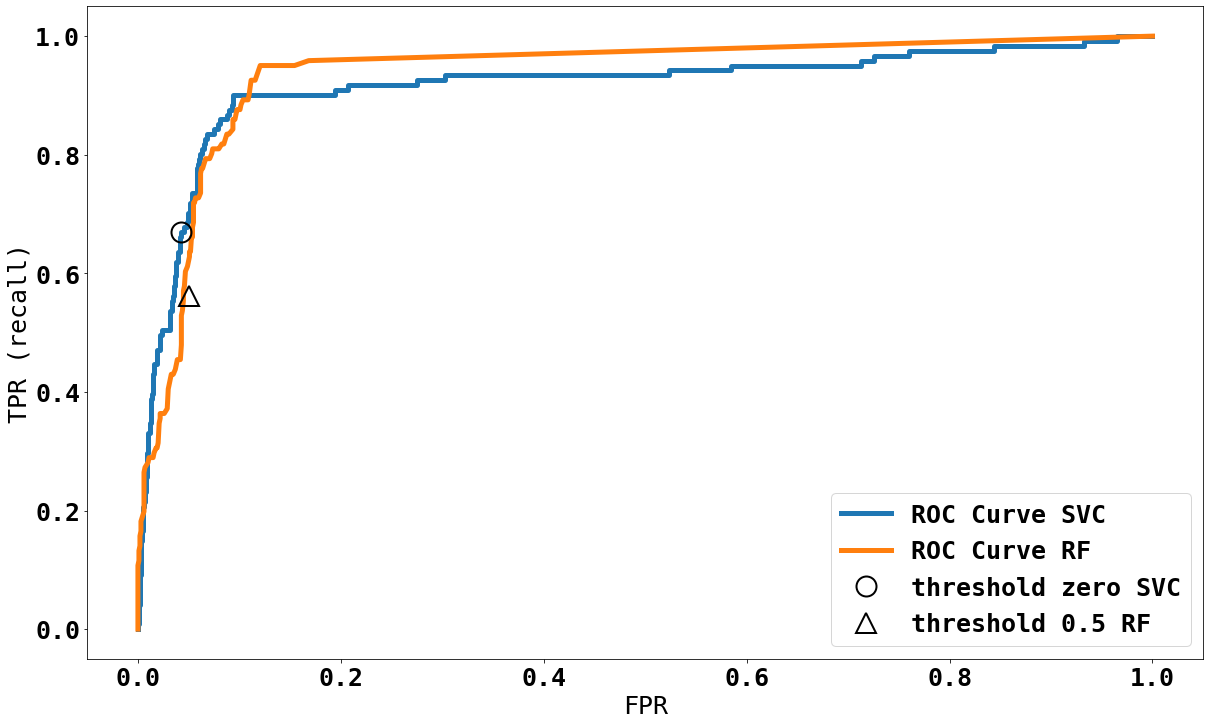

In [24]:
plot_roc_curve()

## Task 2

### Find the best two models by creating a complete pipeline. 
### One model should predict the morphologic pattern and the other the fetal state. 
### Use the best combination of parameters and techniques.

In [25]:
!pip install xlrd

In [57]:
import xlrd

dfs = pd.read_excel("CTG.xls", sheet_name="Data", header=1)
dfs = dfs.drop(['Unnamed: 9','Unnamed: 42','Unnamed: 44'], axis = 1)
dfs = dfs[:-3]
dfs

,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,9.0,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,132.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,133.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,134.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,132.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2059.0,2867.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,140.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,2.0
2122,1576.0,2867.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,140.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,2.0
2123,1576.0,2596.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,140.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,2.0
2124,1576.0,3049.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,140.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,2.0


In [58]:
dfs.dtypes

b              float64
e              float64
AC             float64
FM             float64
UC             float64
DL             float64
DS             float64
DP             float64
DR             float64
LB             float64
AC.1           float64
FM.1           float64
UC.1           float64
DL.1           float64
DS.1           float64
DP.1           float64
ASTV           float64
MSTV           float64
ALTV           float64
MLTV           float64
Width          float64
Min            float64
Max            float64
Nmax           float64
Nzeros         float64
Mode           float64
Mean           float64
Median         float64
Variance       float64
Tendency       float64
Unnamed: 31    float64
A              float64
B              float64
C              float64
D              float64
E              float64
AD             float64
DE             float64
LD             float64
FS             float64
SUSP           float64
CLASS          float64
NSP            float64
dtype: obje

In [59]:
# def _assert_all_finite(X):
#     """Like assert_all_finite, but only for ndarray."""
#     X = np.asanyarray(X)
#     # First try an O(n) time, O(1) space solution for the common case that
#     # everything is finite; fall back to O(n) space np.isfinite to prevent
#     # false positives from overflow in sum method.
#     if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
#             and not np.isfinite(X).all()):
#         raise ValueError("Input contains NaN, infinity"
#                          " or a value too large for %r." % X.dtype)

In [60]:
import pandas as pd

def clean_dataset(dfs):
    assert isinstance(dfs, pd.DataFrame), "df needs to be a pd.DataFrame"
    dfs.dropna(inplace=True)
    indices_to_keep = ~dfs.isin([np.nan, np.inf, -np.inf]).any(1)
    return dfs[indices_to_keep].astype(np.float64)

In [82]:
# dfs.values
X1 = dfs.iloc[:,:40].to_numpy(dtype='int')
y1 = dfs.iloc[:,-1:].to_numpy()

In [83]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# X1 = np.array(dfs.iloc[:,:46])
# y1 = dfs.iloc[:,-1:].values

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, random_state=0)

scaler = MinMaxScaler().fit(X1_train)

X1_train_scaled = scaler.transform(X1_train)

In [84]:
svm = SVC()

# learn an SVM on the scaled training data
svm.fit(X1_train_scaled, y1_train)
#svm.fit(X_train, y_train)

# scale the test data and score the scaled data
X1_test_scaled = scaler.transform(X1_test)
print("Test score: {:.2f}".format(svm.score(X1_test_scaled, y1_test)))

Test score: 0.98


/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X1_train_scaled, y1_train)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best set score: {:.2f}".format(grid.score(X1_test_scaled, y1_test)))
print("Best parameters: ", grid.best_params_)

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Best cross-validation accuracy: 0.99
Best set score: 0.99
Best parameters:  {'C': 100, 'gamma': 0.1}


/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [86]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

pipe.fit(X1_train, y1_train)
print("Test score: {:.2f}".format(pipe.score(X1_test, y1_test)))

Test score: 0.98


/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [87]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
               'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X1_train, y1_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X1_test, y1_test)))
print("Best parameters: {}".format(grid.best_params_))

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Best cross-validation accuracy: 0.99
Test set score: 0.99
Best parameters: {'svm__C': 100, 'svm__gamma': 0.1}


/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
